In [23]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays


# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

In [24]:
df=pd.read_csv('Data2.csv', encoding='utf-8')
# Print the first few columns 
df.iloc[:,:12]

,Id,Sentiment,Day,Year,Gender
0,1792642663,0,1,2018,1
1,1467810672,0,2,2018,1
2,1467810917,1,3,2018,1
3,1467811184,0,4,2018,1
4,1467811193,0,5,2018,1
...,...,...,...,...,...
287,1792642528,0,1,2020,2
288,1792642545,1,2,2020,2
289,1792642577,0,3,2020,2
290,1792642641,0,4,2020,2


In [25]:
# Function that handles sample splitting, model fitting and report printing 
def mfunc(X, y, typ):
    
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    model = typ
    clf = model.fit(X_train, y_train)

    # Predict class labels on a test data
    pred_labels = model.predict(X_test)

    # Print model attributes 
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else: 
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
        
    # Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels

In [26]:
X=df[['Day']]
y=df['Sentiment'].values

# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  [0 1]
Class Priors:  [0.62660944 0.37339056]
--------------------------------------------------------
Accuracy Score:  0.7288135593220338
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        43
           1       0.00      0.00      0.00        16

    accuracy                           0.73        59
   macro avg       0.36      0.50      0.42        59
weighted avg       0.53      0.73      0.61        59



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df=pd.read_csv('Data2.csv', encoding='utf-8')

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='Year'>

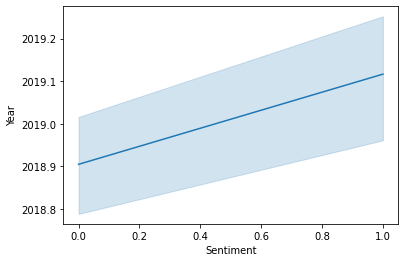

In [46]:
sns.lineplot(df['Sentiment'], df['Year'])